In [107]:
%matplotlib inline
import numpy as np
import pandas as pd
from pylab import *
import matplotlib
#import plplot
from scipy import stats#from io import StringIO
print(pd.__version__)
#AttributeError: 'Series' object has no attribute 'to_numpy'
import re

import math
import astropy as astro
import scipy.ndimage as spimage
from astropy.io import fits, ascii
from astropy.table import Table, join, vstack
from astropy.cosmology import WMAP9 as cosmo
import matplotlib as mpl
#from numpy import std as biweight_midvariance
import matplotlib.cm as cm

from scipy import optimize
import scipy.stats as stats
from scipy.stats import gaussian_kde
from matplotlib import colors
import scipy.ndimage as ndimage
from collections import Counter
from matplotlib.legend import Legend
import matplotlib.patches as patches
from matplotlib import pyplot
#
#
#
import extinction


#
# seaborn
# import pandas.util.testing as tm
import seaborn as sns

#
# Jorge
#

from sel2dhist_xy import sel2dhist_xy


#
# 3D plots!
#
import numpy as np
import scipy.linalg
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

#biweight_midvariance


import warnings
warnings.simplefilter("ignore")

#
# my_utils
#
from my_utils import *

#
#
#
from ndtest import *
from sklearn.decomposition import PCA

#
#
#
from scipy.optimize import leastsq, fmin
import matplotlib.animation as animation

#
# Carlos Color map
#
from cmaps_CLC import vel_map



2.2.0


In [108]:
#from pyFIT3D.modelling.stellar import SSPModels

In [109]:

def search_col(tab,key):
    for cols in tab.columns:
        if (cols.find(key)>-1):
            print(cols)

In [110]:
import matplotlib.colors as mcolors
color_cm_now = vel_map()
f = open('colortables/CLC_vmap.csv', 'w')
for i in range(color_cm_now.N):
    val=color_cm_now(i)
    val_str=f'{val[0]},{val[1]},{val[2]},{val[3]}\n'
#    f.write("Hello, World!\n")
#    print(val_str)
    f.write(val_str);
f.close()
#color_list = [mcolors.rgb2hex(color_cm_now(i)) for i in range(color_cm_now.N)]
#print(color_list)

In [111]:
from matplotlib import rcParams as rc
rc.update({'font.size': 20,\
           'font.weight': 900,\
           'text.usetex': True,\
           'path.simplify'           :   True,\
           'xtick.labelsize' : 20,\
           'ytick.labelsize' : 20,\
#           'xtick.major.size' : 3.5,\
#           'ytick.major.size' : 3.5,\
           'axes.linewidth'  : 2.0,\
               # Increase the tick-mark lengths (defaults are 4 and 2)
           'xtick.major.size'        :   6,\
           'ytick.major.size'        :   6,\
           'xtick.minor.size'        :   3,\
           'ytick.minor.size'        :   3,\
           'xtick.major.width'       :   1,\
           'ytick.major.width'       :   1,\
           'lines.markeredgewidth'   :   1,\
           'legend.numpoints'        :   1,\
           'xtick.minor.width'       :   1,\
           'ytick.minor.width'       :   1,\
           'legend.frameon'          :   False,\
           'legend.handletextpad'    :   0.3,\
           'font.family'    :   'serif',\
           'mathtext.fontset'        :   'stix',\
           'axes.facecolor' : "w",\
           
          })


In [133]:
###################################################################
# We use the MaNGA DR17 Pipe3D VAC as a basis for comparison
#
# I will add later on other tables (e.g., ALMAQUEST/EDGE-CALIFA)
#
###################################################################

hdu=fits.open("tables/SDSS17Pipe3D_v3_1_1.fits")
table=Table(hdu[1].data)
table['log_Mass_phot'] = table['log_Mass_phot']+0.28

ssp=hdu[2].data
morph={-2:'CD',-1:'E',0:'S0',1:'Sa',2:'Sab',3:'Sb',4:'Sbc',5:'Sc',6:'Scd',\
       7:'Sd',8:'Sdm',9:'Sm',10:'Irr'}
# tab.add_column(tab['r_band_abs_mag']-tab['r-i']-tab['i-z'],name='z_abs')
#tab.add_column(tab['u-g']+tab['g-r']+tab['r-i']+tab['i-z'],name='u-z')
#tab_all=tab

#
# Velocity dispersions matched to the DAP ones
#

s_res_Ha=45
x_par=np.sqrt((table['vel_disp_Ha_1Re'])**2-s_res_Ha**2)
sig_res=75
y_par=np.sqrt((table['vel_disp_ssp_1Re'])**2+sig_res**2)*1.15-41
table.add_column(x_par,name='vel_disp_Ha_1Re_cor')
table.add_column(y_par,name='vel_disp_ssp_1Re_cor')






In [134]:
##########################################################################
# We read the KG-Pipe3D catalog
##########################################################################
hdu = fits.open('tables/KG_Pipe3D_table_COSMO.fits')
tab_KG = Table(hdu[1].data)
tab_KG.rename_column('name','org_name')
tab_KG.rename_column('cubename','name')

9828


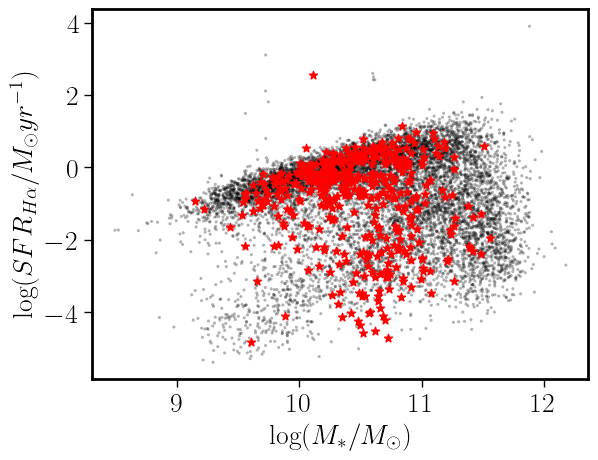

In [135]:
qc_mask = table['QCFLAG'] == 0
tab=table[qc_mask]
plt.scatter(tab['log_Mass'],tab['log_SFR_Ha'],edgecolor='None',color='black',alpha=0.3,s=5)
plt.scatter(tab_KG['log_Mass'],tab_KG['log_SFR_Ha'],color='red',marker='*')
plt.xlabel(r'$\log(M_*/M_\odot)$')
plt.ylabel(r'$\log(SFR_{H\alpha}/M_\odot yr^{-1})$')
print(len(tab))

9828


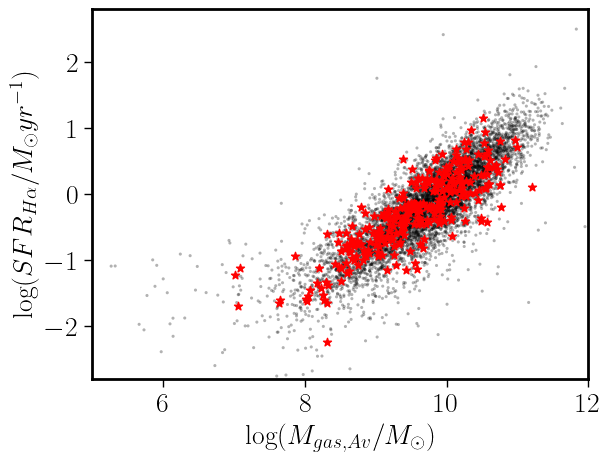

In [163]:
qc_mask = table['QCFLAG'] == 0
tab=table[qc_mask]
plt.scatter(tab['log_Mass_gas'],tab['log_SFR_Ha'],edgecolor='None',color='black',alpha=0.3,s=5)
plt.scatter(tab_KG['log_Mass_gas'],tab_KG['log_SFR_Ha'],color='red',marker='*')
plt.xlabel(r'$\log(M_{gas,Av}/M_\odot)$')
plt.ylabel(r'$\log(SFR_{H\alpha}/M_\odot yr^{-1})$')
plt.xlim(5,12)
plt.ylim(-2.8,2.8)

print(len(tab))

In [136]:
tab.add_column(tab['r_band_abs_mag']-tab['r-i']-tab['i-z'],name='z_abs')
tab.add_column(tab['u-g']+tab['g-r']+tab['r-i']+tab['i-z'],name='u-z')
tab_all=tab

In [137]:
qc_warning = table['QCFLAG'] >1
qc_bad = table['QCFLAG'] == 1
print (len(table))
print (len(tab))
print (len(table[qc_warning]))
print (len(table[qc_bad]))

10220
9828
386
6


In [138]:
mKG_manga = np.array(['MaNGA' in name for name in tab_KG['name']])
mKG_sami = ~mKG_manga

Text(0, 0.5, '$\\log(M_{*,phot}/M_\\odot)$')

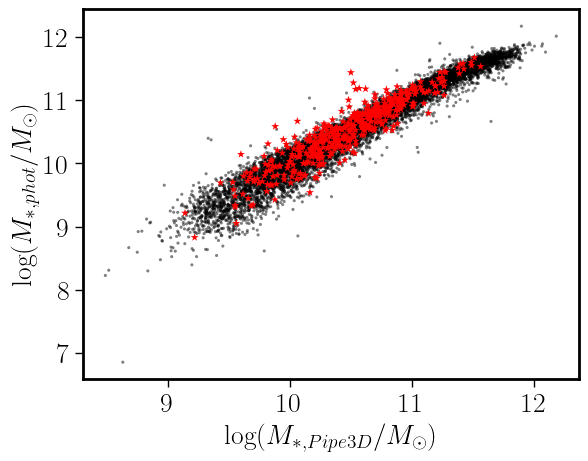

In [139]:


x_p = 'log_Mass'
y_p = 'log_Mass_phot'
x_l = r'$\log(M_{*,Pipe3D}/M_\odot)$'
y_l = r'$\log(M_{*,phot}/M_\odot)$'



plt.scatter(tab[x_p],tab[y_p],color='k',edgecolor='None',alpha=0.5,s=5)
plt.scatter(tab_KG[x_p],tab_KG[y_p],marker='*',color='red',edgecolor='None')
plt.xlabel(x_l)
plt.ylabel(y_l)


Text(0, 0.5, '$T_{90}$ (Gyr)')

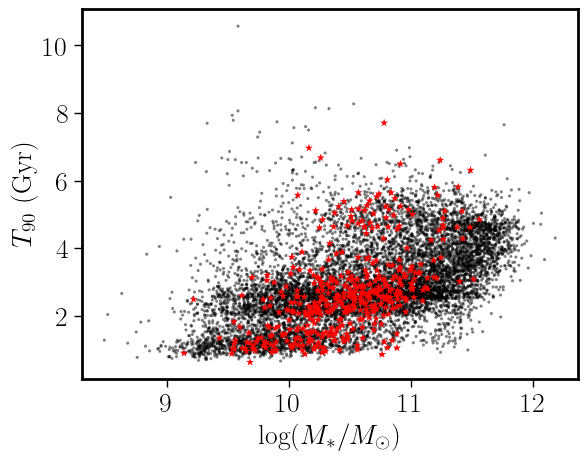

In [140]:
plt.scatter(tab['log_Mass'],tab['T90'],color='k',edgecolor='None',alpha=0.5,s=5)
plt.scatter(tab_KG['log_Mass'],tab_KG['T90'],marker='*',color='red',edgecolor='None')
plt.xlabel(r'$\log(M_*/M_\odot)$')
plt.ylabel(r'$T_{90}$ (Gyr)')
#plt.scatter(tab['log_Mass_phot'],tab['T90'],color='k',edgecolor='None',alpha=0.5,s=5)


Text(0, 0.5, '12+log(O/H)$_{Cur17}$ (O3N2)')

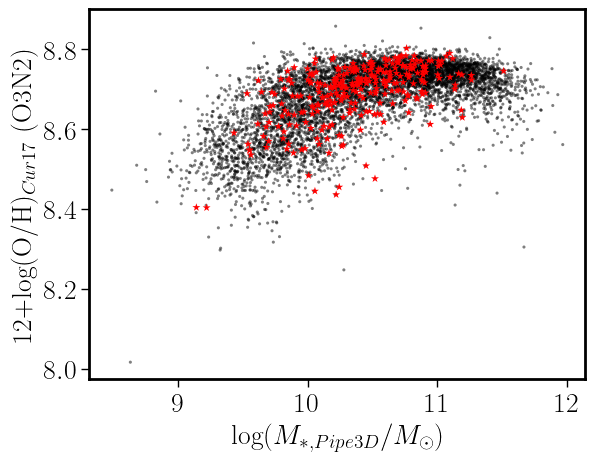

In [141]:
x_p = 'log_Mass'
y_p = 'OH_Cur20_O3N2_Re_fit'
y_p_KG = 'OH_Re'
x_l = r'$\log(M_{*,Pipe3D}/M_\odot)$'
y_l = r'12+log(O/H)$_{Cur17}$ (O3N2)'



plt.scatter(tab[x_p],tab[y_p],color='k',edgecolor='None',alpha=0.5,s=5)
plt.scatter(tab_KG[x_p],tab_KG[y_p],marker='*',color='red',edgecolor='None')
plt.xlabel(x_l)
plt.ylabel(y_l)

In [ ]:
#############################################
# If you want to look for a particular parameter, and you do not know the name,
# you can use this function

search_col(tab_KG,'ZH')

ZH_LW_Re_fit
e_ZH_LW_Re_fit
alpha_ZH_LW_Re_fit
e_alpha_ZH_LW_Re_fit
ZH_MW_Re_fit
e_ZH_MW_Re_fit
alpha_ZH_MW_Re_fit
e_alpha_ZH_MW_Re_fit
ZH_T30
ZH_Re_T30
a_ZH_T30
ZH_T40
ZH_Re_T40
a_ZH_T40
ZH_T50
ZH_Re_T50
a_ZH_T50
ZH_T60
ZH_Re_T60
a_ZH_T60
ZH_T70
ZH_Re_T70
a_ZH_T70
ZH_T80
ZH_Re_T80
a_ZH_T80
ZH_T90
ZH_Re_T90
a_ZH_T90
ZH_T95
ZH_Re_T95
a_ZH_T95
ZH_T99
ZH_Re_T99
a_ZH_T99


Text(0, 0.5, '[Z/H] LW Re ')

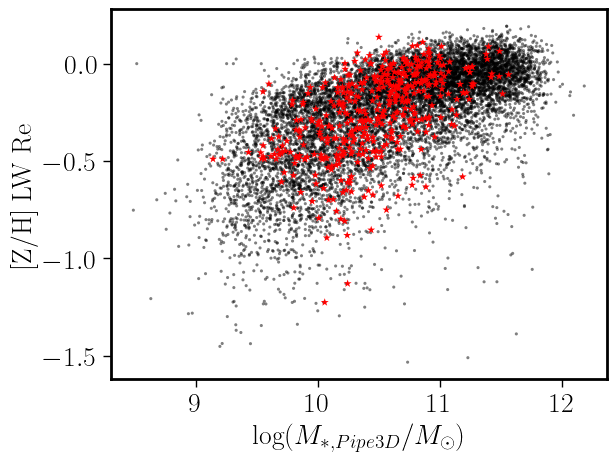

In [143]:
x_p = 'log_Mass'
y_p = 'ZH_LW_Re_fit'
x_l = r'$\log(M_{*,Pipe3D}/M_\odot)$'
y_l = r'[Z/H] LW Re '


plt.scatter(tab[x_p],tab[y_p],color='k',edgecolor='None',alpha=0.5,s=5)
plt.scatter(tab_KG[x_p],tab_KG[y_p],marker='*',color='red',edgecolor='None')
plt.xlabel(x_l)
plt.ylabel(y_l)

In [144]:
#print(tab['best_type'])
tab['best_type'][tab['best_type_n']==-2]='CD'
tab['best_type'][tab['best_type_n']==-1]='E'
tab['best_type'][tab['best_type_n']==0]='S0'
tab['best_type'][tab['best_type_n']==1]='Sa'
tab['best_type'][tab['best_type_n']==2]='Sab'
tab['best_type'][tab['best_type_n']==3]='Sb'
tab['best_type'][tab['best_type_n']==4]='Sbc'
tab['best_type'][tab['best_type_n']==5]='Sc'
tab['best_type'][tab['best_type_n']==6]='Scd'
tab['best_type'][tab['best_type_n']==7]='Sd'
tab['best_type'][tab['best_type_n']==8]='Sdm'
tab['best_type'][tab['best_type_n']==9]='Sm'
tab['best_type'][tab['best_type_n']==10]='Irr'
# Check
print(tab['name'][tab['best_type_n']==10])


       name      
-----------------
 manga-10215-6102
 manga-10217-9102
manga-10218-12704
 manga-10225-6102
 manga-10508-6103
manga-10841-12702
manga-11744-12704
 manga-11941-9101
 manga-11942-6102
manga-11945-12703
              ...
 manga-9089-12703
  manga-9500-3702
 manga-9504-12705
  manga-9509-3702
 manga-9513-12701
 manga-9872-12704
  manga-9876-3702
  manga-9881-9102
  manga-9885-6101
  manga-9886-3701
 manga-9892-12702
Length = 62 rows


(0.0, 20.0)

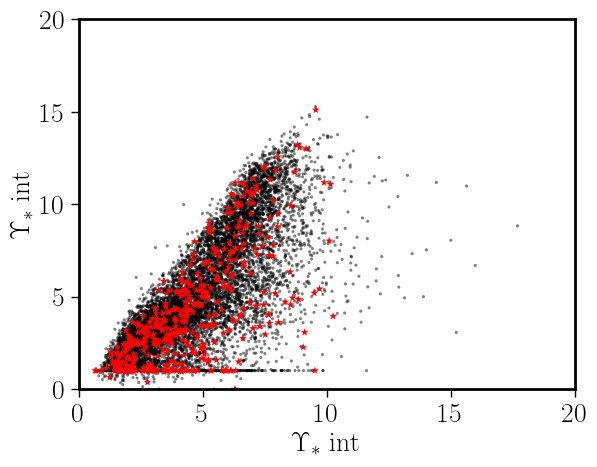

In [145]:
x_p = 'ML_int'
y_p = 'ML_avg'
x_l = r'$\Upsilon_{*}$ int' # r'$\log(M_{*,Pipe3D}/M_\odot)$'
y_l = r'$\Upsilon_{*}$ int' # r'$\log(M_{*,phot}/M_\odot)$'



plt.scatter(tab[x_p],tab[y_p],color='k',edgecolor='None',alpha=0.5,s=5)
plt.scatter(tab_KG[x_p],tab_KG[y_p],marker='*',color='red',edgecolor='None')
plt.xlabel(x_l)
plt.ylabel(y_l)
plt.xlim(0,20)
plt.ylim(0,20)



In [146]:


#
# Only for 



0 -2 10 13
1 -2 10 13
2 -2 10 13
3 -2 10 13
4 -2 10 13
5 -2 10 13
6 -2 10 13
7 -2 10 13
8 -2 10 13
9 -2 10 13
10 -2 10 13
11 -2 10 13
12 -2 10 13


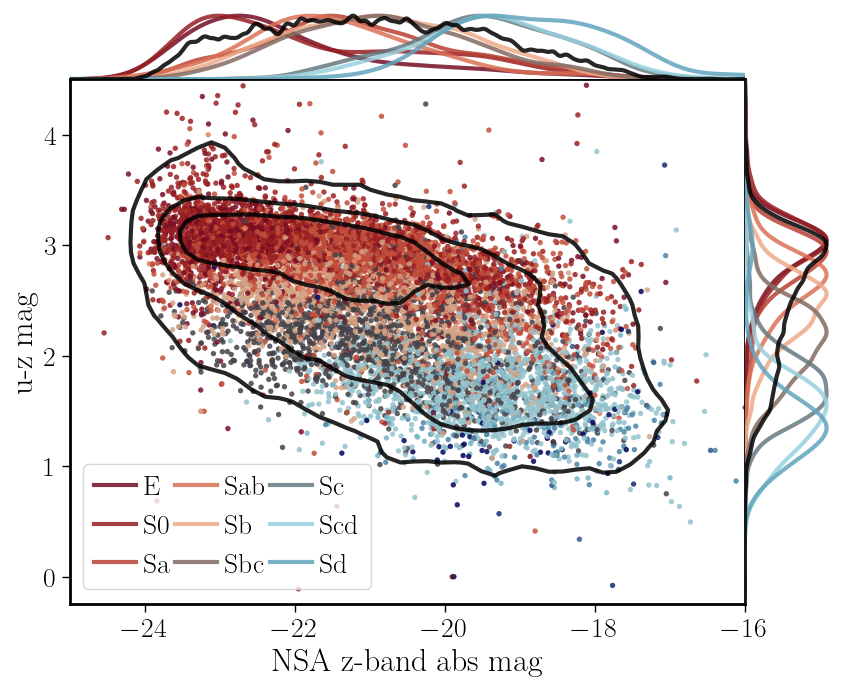

In [147]:
def plot_2Dhist(x_par=tab_all['z_abs'],y_par=tab_all['u-z'],z_par=tab_all['best_type_n'],\
                x_min=-25,x_max=-16,y_min=0,y_max=4.5,z_min=-2,z_max=10,c_main='grey',label='MPL-11',\
                x_label='NSA z-band abs mag',y_label='u-z mag',figname='CMD_diag',alpha=0.75,\
                   size_scatter=5.0,n_zbins=11,labels_zbins=None,color_cm_now='coolwarm_r',z_lim=80,\
               x_loc=0.02,y_loc=0.03,z_label='',reverse=0, xscale='linear', yscale='linear'):

    fig = plt.figure(figsize=(9,7))
    left, width = 0.15, 0.75
    bottom, height = 0.15, 0.75
    spacing = 0.00
    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom + height + spacing, width, 1-(bottom+height)]
    rect_histy = [left + width + spacing, bottom, 1-(left+width), height]
    ax = fig.add_axes(rect_scatter)
    ax_histx = fig.add_axes(rect_histx, sharex=ax)
    ax_histy = fig.add_axes(rect_histy, sharey=ax)
    if (color_cm_now is None):
        color_cm_now = vel_map()
        if (reverse==1):
            color_cm_now=color_cm_now.reversed()
    colormap=cm.get_cmap(color_cm_now)


#    colormap = plt.cm(color_cm_now)
    ax.scatter(x_par, y_par, s=size_scatter*3, c=z_par,\
               vmin=z_min,vmax=z_max,alpha=alpha,edgecolor='none',cmap=color_cm_now,\
               rasterized=True,label=label)
    my_contour(ax,x_par,y_par,x_min,x_max,y_min,y_max,c_color=c_main,\
               nbins=50,title=label,linewidths=3,alpha=alpha)
#
# X-histogram 
#
    
    
    xx = np.linspace(x_min, x_max, 1000)
    kde_xx=stats.gaussian_kde(x_par)
    kde_xx.set_bandwidth(bw_method=kde_xx.factor / 5.)
    max_kde_xx=np.max(kde_xx(xx))
    
    delta_z=(z_max-z_min)/n_zbins
    Ncolors = min(colormap.N,n_zbins)
    mapcolors = [colormap(int(x*colormap.N/Ncolors)) for x in range(Ncolors)]
    if (labels_zbins==None):
        labels_zbins=np.zeros(n_zbins)
    for indx,z_bins in enumerate(np.linspace(z_min,z_max,n_zbins)):
        z_bin_min = z_bins-0.5*delta_z
        z_bin_max = z_bins+0.5*delta_z
        print(indx,z_min,z_max,n_zbins)
        if (labels_zbins[indx]==0):
            labels_zbins[indx]=z_bins
        xx = np.linspace(x_min, x_max, 1000)
        mask_z_par = (z_par>z_bin_min) & (z_par<=z_bin_max)
        if (len(x_par[mask_z_par])>0):
            kde=stats.gaussian_kde(x_par[mask_z_par])
            kde.set_bandwidth(bw_method=kde.factor / 1.)
            if(len(x_par[mask_z_par])>z_lim):
                ax_histx.plot(xx,max_kde_xx*(kde(xx)/np.max(kde(xx))),\
                              color=mapcolors[indx],linewidth=3,alpha=alpha,\
                              label=labels_zbins[indx])
    ax_histx.plot(xx,kde_xx(xx),color=c_main,linewidth=3,alpha=alpha)
    ax_histx.set_ylim(0,1.1*np.max(kde_xx(xx)))    
#
# Y-histogram 
#

    yy = np.linspace(y_min, y_max, 1000)
    kde_yy=stats.gaussian_kde(y_par)
    kde_yy.set_bandwidth(bw_method=kde_yy.factor / 2.)
    max_kde_yy=np.max(kde_yy(yy))
    for indx,z_bins in enumerate(np.linspace(z_min,z_max,n_zbins)):
        z_bin_min = z_bins-0.5*delta_z
        z_bin_max = z_bins+0.5*delta_z
        if (labels_zbins[indx]==0):
            labels_zbins[indx]=z_bins
        mask_z_par = (z_par>z_bin_min) & (z_par<=z_bin_max)
        #print(z_bins,len(x_par[mask_z_par]))
        if (len(y_par[mask_z_par])>0):
            kde=stats.gaussian_kde(y_par[mask_z_par])
            kde.set_bandwidth(bw_method=kde.factor / 1.)
            if(len(y_par[mask_z_par])>z_lim):
                ax_histy.plot(max_kde_yy*(kde(yy)/np.max(kde(yy))),yy,\
                              color=mapcolors[indx],linewidth=3,alpha=alpha,\
                              label=labels_zbins[indx])
    
    
    ax_histy.plot(kde_yy(yy),yy,color=c_main,linewidth=3,alpha=alpha)
    ax_histy.set_xlim(0,1.1*np.max(kde_yy(yy)))

    ax_histx.spines['right'].set_visible(False)
    ax_histx.spines['top'].set_visible(False)
    ax_histx.spines['bottom'].set_visible(False)
    ax_histx.spines['left'].set_visible(False)
    ax_histx.get_xaxis().set_visible(False)
    ax_histx.get_yaxis().set_visible(False)

    ax_histy.spines['right'].set_visible(False)
    ax_histy.spines['top'].set_visible(False)
    ax_histy.spines['bottom'].set_visible(False)
    ax_histy.spines['left'].set_visible(False)
    ax_histy.get_xaxis().set_visible(False)
    ax_histy.get_yaxis().set_visible(False)

    ax.set_xlabel(x_label, fontsize=23)
    ax.set_ylabel(y_label, fontsize=23)

    ax.set_xlim(x_min,x_max)
    ax.set_ylim(y_min,y_max)

    handles, labels = ax_histx.get_legend_handles_labels()
    ax.legend(handles, labels,loc=(x_loc,y_loc),frameon=True,\
              handlelength=1.5,ncol=3,columnspacing=0.15,title=z_label)
    ax.set_xscale(xscale)
    ax.set_yscale(yscale)
    fig.tight_layout()
    fig.savefig(figname+".pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")

morph_list=[]
for key, value in morph.items():
    temp = value
    morph_list.append(temp)

#
# Only for MaNGA
#
    
plot_2Dhist(x_par=tab_all['z_abs'],y_par=tab_all['u-z'],z_par=tab_all['best_type_n'],\
            x_min=-25,x_max=-16,y_min=-0.25,y_max=4.5,z_min=-2,z_max=10,c_main='black',label='MPL-11',\
            x_label='NSA z-band abs mag',y_label='u-z mag',figname='CMD_diag',alpha=0.85,\
            size_scatter=5.0,n_zbins=13,z_lim=80,labels_zbins=morph_list,color_cm_now=None,\
            reverse=1)#'Spectral_r')




E
0 0 3 4
1 0 3 4
2 0 3 4
3 0 3 4


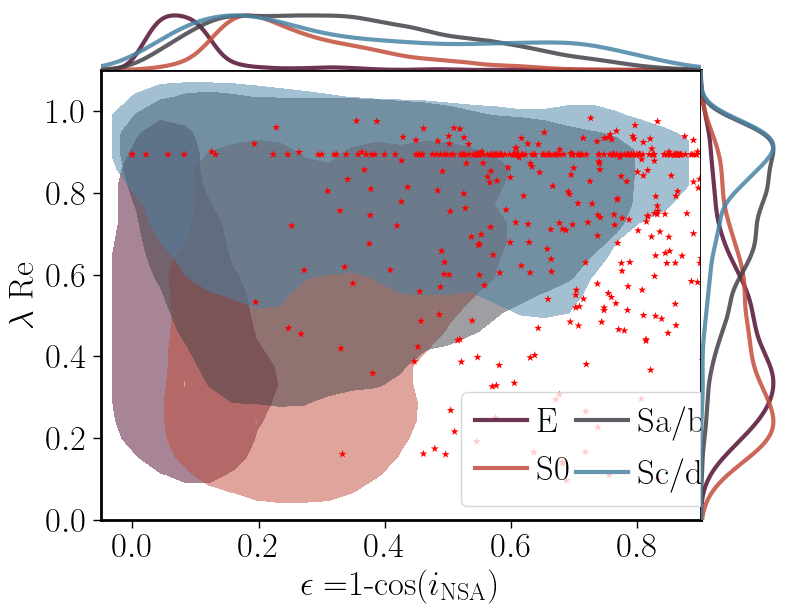

In [148]:
#
#
#
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    '''
    https://stackoverflow.com/a/18926541
    '''
    if isinstance(cmap, str):
        cmap = plt.get_cmap(cmap)
    new_cmap = mpl.colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

rc.update({'font.size': 25,\
           'font.weight': 900,\
           'text.usetex': True,\
           'path.simplify'           :   True,\
           'xtick.labelsize' : 25,\
           'ytick.labelsize' : 25})
           
def plot_2Dhist_map(x_par=tab_all['z_abs'],y_par=tab_all['u-z'],z_par=tab_all['best_type_n'],\
                x_min=-25,x_max=-16,y_min=0,y_max=4.5,z_min=-2,z_max=10,c_main='grey',label='MPL-11',\
                x_label='NSA z-band abs mag',y_label='u-z mag',figname='CMD_diag',alpha=0.75,\
                   size_scatter=5.0,n_zbins=11,labels_zbins=None,color_cm_now='coolwarm_r',z_lim=80,\
               x_loc=0.02,y_loc=0.03,z_label='',reverse=0, xscale='linear', yscale='linear'):

    fig = plt.figure(figsize=(8,6))
    left, width = 0.15, 0.75
    bottom, height = 0.15, 0.75
    spacing = 0.00
    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom + height + spacing, width, 1-(bottom+height)]
    rect_histy = [left + width + spacing, bottom, 1-(left+width), height]
    ax = fig.add_axes(rect_scatter)
    ax_histx = fig.add_axes(rect_histx, sharex=ax)
    ax_histy = fig.add_axes(rect_histy, sharey=ax)
    if (color_cm_now is None):
        color_cm_now = vel_map()
        if (reverse==1):
            color_cm_now=color_cm_now.reversed()
    colormap=cm.get_cmap(color_cm_now)


#    colormap = plt.cm(color_cm_now)
    #ax.scatter(x_par, y_par, s=size_scatter*3, \
    #           alpha=0.1*alpha,edgecolor='none',color='black',\
    #           rasterized=True,label=label)
    
#    for indx in arange(n_zbins):
    
#    my_contour(ax,x_par,y_par,x_min,x_max,y_min,y_max,c_color=c_main,\
#               nbins=50,title=label,linewidths=3,alpha=alpha)
#
# X-histogram 
#
    
    
    xx = np.linspace(x_min, x_max, 1000)
    kde_xx=stats.gaussian_kde(x_par)
    kde_xx.set_bandwidth(bw_method=kde_xx.factor / 5.)
    max_kde_xx=np.max(kde_xx(xx))
    
    delta_z=(z_max-z_min)/n_zbins
    Ncolors = min(colormap.N,n_zbins)
    mapcolors = [colormap(int(x*colormap.N/Ncolors)) for x in range(Ncolors)]
#    print(mapcolors)
    if (labels_zbins==None):
        labels_zbins=np.zeros(n_zbins)
    for indx,z_bins in enumerate(np.linspace(z_min,z_max,n_zbins)):
        z_bin_min = z_bins-0.5*delta_z
        z_bin_max = z_bins+0.5*delta_z
        print(indx,z_min,z_max,n_zbins)
        if (labels_zbins[indx]==0):
            labels_zbins[indx]=z_bins
        xx = np.linspace(x_min, x_max, 1000)
        mask_z_par = (z_par>z_bin_min) & (z_par<=z_bin_max)
        if (len(x_par[mask_z_par])>0):
            kde=stats.gaussian_kde(x_par[mask_z_par])
            kde.set_bandwidth(bw_method=kde.factor / 1.)
            if(len(x_par[mask_z_par])>z_lim):
                ax_histx.plot(xx,max_kde_xx*(kde(xx)/np.max(kde(xx))),\
                              color=mapcolors[indx],linewidth=3,alpha=alpha,\
                              label=labels_zbins[indx])
        new_cmap=truncate_colormap(colormap, minval=indx/n_zbins-0.05, maxval=indx/n_zbins+0.05, n=3)
        my_contourf(ax,x_par[mask_z_par],y_par[mask_z_par],\
                   x_min,x_max,y_min,y_max,c_color=mapcolors[indx],\
            nbins=25,title=label,linewidths=3,alpha=0.6*alpha,\
                   conts=[0.85,0.01],cmap=new_cmap,colors=1)
#    ax_histx.plot(xx,kde_xx(xx),color=c_main,linewidth=3,alpha=alpha)
    ax_histx.set_ylim(0,1.1*np.max(kde_xx(xx)))    

    
    
#
# Y-histogram 
#

    yy = np.linspace(y_min, y_max, 1000)
    kde_yy=stats.gaussian_kde(y_par)
    kde_yy.set_bandwidth(bw_method=kde_yy.factor / 2.)
    max_kde_yy=np.max(kde_yy(yy))
    for indx,z_bins in enumerate(np.linspace(z_min,z_max,n_zbins)):
        z_bin_min = z_bins-0.5*delta_z
        z_bin_max = z_bins+0.5*delta_z
        if (labels_zbins[indx]==0):
            labels_zbins[indx]=z_bins
        mask_z_par = (z_par>z_bin_min) & (z_par<=z_bin_max)
        #print(z_bins,len(x_par[mask_z_par]))
        if (len(y_par[mask_z_par])>0):
            kde=stats.gaussian_kde(y_par[mask_z_par])
            kde.set_bandwidth(bw_method=kde.factor / 1.)
            if(len(y_par[mask_z_par])>z_lim):
                ax_histy.plot(max_kde_yy*(kde(yy)/np.max(kde(yy))),yy,\
                              color=mapcolors[indx],linewidth=3,alpha=alpha,\
                              label=labels_zbins[indx])
    
    
#    ax_histy.plot(kde_yy(yy),yy,color=c_main,linewidth=3,alpha=alpha)
    ax_histy.set_xlim(0,1.1*np.max(kde_yy(yy)))

    ax_histx.spines['right'].set_visible(False)
    ax_histx.spines['top'].set_visible(False)
    ax_histx.spines['bottom'].set_visible(False)
    ax_histx.spines['left'].set_visible(False)
    ax_histx.get_xaxis().set_visible(False)
    ax_histx.get_yaxis().set_visible(False)

    ax_histy.spines['right'].set_visible(False)
    ax_histy.spines['top'].set_visible(False)
    ax_histy.spines['bottom'].set_visible(False)
    ax_histy.spines['left'].set_visible(False)
    ax_histy.get_xaxis().set_visible(False)
    ax_histy.get_yaxis().set_visible(False)

    ax.set_xlabel(x_label, fontsize=25)
    ax.set_ylabel(y_label, fontsize=25)

    ax.set_xlim(x_min,x_max)
    ax.set_ylim(y_min,y_max)

    handles, labels = ax_histx.get_legend_handles_labels()
    ax.legend(handles, labels,loc=(x_loc,y_loc),frameon=True,\
              handlelength=1.5,ncol=2,columnspacing=0.15,title=z_label)
    ax.set_xscale(xscale)
    ax.set_yscale(yscale)
    return fig,ax
#    fig.tight_layout()
#    fig.savefig(figname+".pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")

##########
    
mask_now_in = (tab_all['Lambda_Re'] > -0.01) & (tab['nsa_inclination']>0)
morph_few = np.zeros(len(tab_all['best_type_n']))-10
morph_few[tab_all['best_type_n']==-1]=0
morph_few[tab_all['best_type_n']==0]=1
morph_few[(tab_all['best_type_n']>0) &(tab_all['best_type_n']<5)]=2
morph_few[(tab_all['best_type_n']>4) &(tab_all['best_type_n']<9)]=3
#morph_few[(tab_all['best_type_n']>0) &(tab_all['best_type_n']<7)]=2

mask_now = mask_now_in & (morph_few!=-10)

ab=np.sqrt((1-tab['ellip']**2-0.13**2)/(1-0.13**2))
ab=np.cos(tab['nsa_inclination']/180*np.pi)
#print(tab['nsa_inclination'])
#tab.add_column(
morph_list_few=['E','S0','Sa/b','Sc/d']
print(morph_list_few[0])
fig,ax=plot_2Dhist_map(x_par=(1-ab)[mask_now],y_par=tab_all['Lambda_Re'][mask_now],\
            z_par=morph_few[mask_now],\
            x_min=-0.05,x_max=0.9,y_min=0,y_max=1.1,z_min=0,z_max=3,c_main='black',label='MPL-11',\
            x_label=r'$\epsilon=$1-cos($i_{\rm NSA}$)',y_label=r'$\lambda$ Re',figname='lambda_e',alpha=0.85,\
            size_scatter=5.0,n_zbins=4,z_lim=80,labels_zbins=morph_list_few,color_cm_now=None,\
            reverse=1,x_loc=0.6)#'Spectral_r')
mask_irr = mask_now_in & (tab_all['best_type_n']>9)
#ax.scatter((1-ab)[mask_irr],tab_all['Lambda_Re'][mask_irr],marker='*',color='black')

ax.scatter(tab_KG['ellip'],tab_KG['Lambda_Re'],marker='*',color='red',edgecolor='None')

fig.tight_layout()
fig.savefig("lambda_ellip.pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")

0 0 3 4
1 0 3 4
2 0 3 4
3 0 3 4


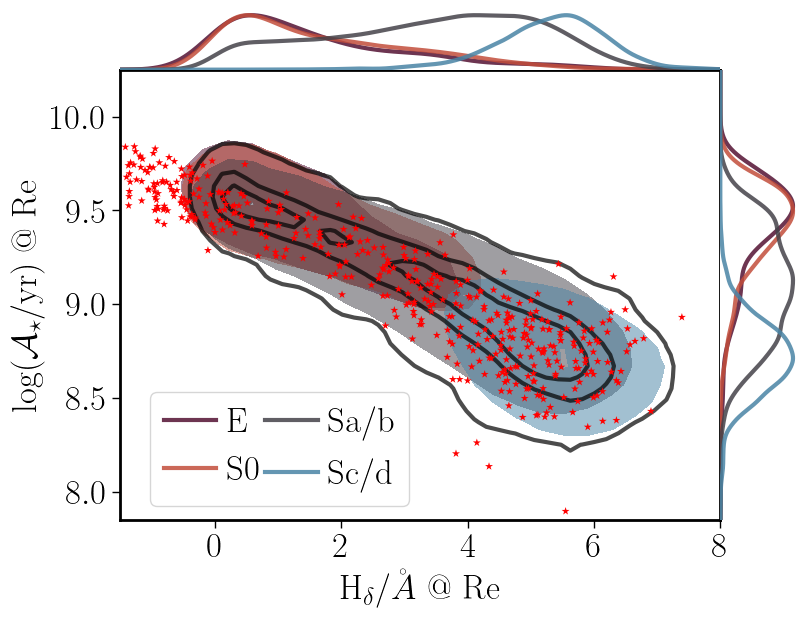

In [149]:
mask_now = mask_now_in & (morph_few!=-10) & ( tab['Hd_Re_fit'] > 0) & (tab['Age_LW_Re_fit']>0)
x=tab['Hd_Re_fit'][mask_now]
y=tab['Age_LW_Re_fit'][mask_now]
z=morph_few[mask_now]
x_min=-1.5
x_max=8
fig,ax=plot_2Dhist_map(x_par=x,y_par=y,\
            z_par=z,\
            x_min=x_min,x_max=x_max,y_min=7.85,y_max=10.25,z_min=0,z_max=3,c_main='black',label='MPL-11',\
            x_label=r'H$_\delta$/$\AA$ @ Re',y_label=r'log($\mathcal{A}_\star$/yr) @ Re',figname='lambda_e',alpha=0.85,\
            size_scatter=5.0,n_zbins=4,z_lim=80,labels_zbins=morph_list_few,color_cm_now=None,\
            reverse=1,x_loc=0.05)#'Spectral_r')
my_contour(ax,x,y,x_min,x_max,7.5,10.5,c_color='black',\
               nbins=50,title='',linewidths=3,alpha=0.7)
#

ax.scatter(tab_KG['Hd_Re_fit'],tab_KG['Age_LW_Re_fit'],marker='*',color='red',edgecolor='None')
#mask_irr = mask_now_in & (tab['best_type_n']>9)
#ax.scatter((1-ab)[mask_irr],tab['Lambda_Re'][mask_irr],marker='*',color='black')

fig.tight_layout()
fig.savefig("Hd_Age.pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")

0 0 3 4
1 0 3 4
2 0 3 4
3 0 3 4


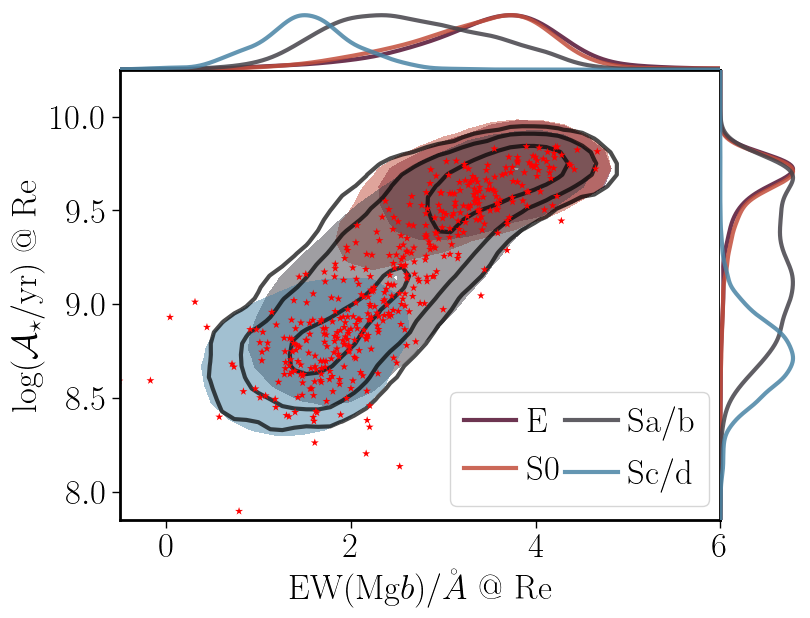

In [150]:
mask_now = mask_now_in & (morph_few!=-10) & ( tab['Mgb_Re_fit'] > -10) & (tab['Age_LW_Re_fit']>0)
x=tab['Mgb_Re_fit'][mask_now]
y=tab['Age_LW_Re_fit'][mask_now]
z=morph_few[mask_now]
x_min=-0.5
x_max=6.0
fig,ax=plot_2Dhist_map(x_par=x,y_par=y,\
            z_par=z,\
            x_min=x_min,x_max=x_max,y_min=7.85,y_max=10.25,z_min=0,z_max=3,c_main='black',label='MPL-11',\
            x_label=r'EW(Mg$b$)/$\AA$ @ Re',y_label=r'log($\mathcal{A}_\star$/yr) @ Re',figname='lambda_e',alpha=0.85,\
            size_scatter=5.0,n_zbins=4,z_lim=80,labels_zbins=morph_list_few,color_cm_now=None,\
            reverse=1,x_loc=0.55)#'Spectral_r')
my_contour(ax,x,y,x_min,x_max,7.5,10.5,c_color='black',\
               nbins=50,title='',linewidths=3,alpha=0.7)
#
ax.scatter(tab_KG['Mgb_Re_fit'],tab_KG['Age_LW_Re_fit'],marker='*',color='red',edgecolor='None')

#mask_irr = mask_now_in & (tab['best_type_n']>9)
#ax.scatter((1-ab)[mask_irr],tab['Lambda_Re'][mask_irr],marker='*',color='black')

fig.tight_layout()
fig.savefig("Mgb_Age.pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")

In [151]:
tab['MgFe'] = np.sqrt(tab['Mgb_Re_fit']*(0.72*tab['Fe5270_Re_fit']+0.28*tab['Fe5335_Re_fit']))
tab_KG['MgFe'] = np.sqrt(tab_KG['Mgb_Re_fit']*(0.72*tab_KG['Fe5270_Re_fit']+0.28*tab_KG['Fe5335_Re_fit']))


In [152]:
rc.update({'font.size': 20,\
           'font.weight': 900,\
           'text.usetex': True,\
           'path.simplify'           :   True,\
           'xtick.labelsize' : 20,\
           'ytick.labelsize' : 20})

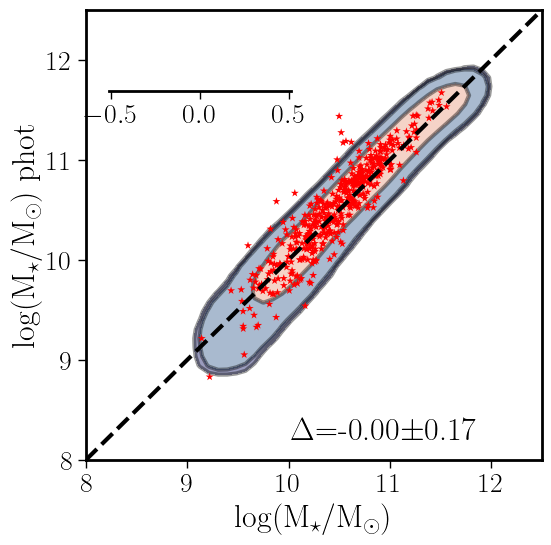

In [153]:
#def comp_plot(fig)

def comp_plot(x_par=tab_all['log_Mass'],y_par=tab_all['log_Mass_phot'],\
                x_min=7,x_max=13,y_min=7,y_max=13,c_main='grey',label='MPL-11',\
                x_label='log Mass',y_label='log Mass',figname='Mst_comp',alpha=0.75,\
                   size_scatter=5.0,n_zbins=11,labels_zbins=None,color_cm_now='coolwarm_r',z_lim=80,\
               x_loc=0.02,y_loc=0.03,z_label='',reverse=0, xscale='linear', yscale='linear', 
               scatter=1,cmap=color_cm_now,conts=[0.99,0.95,0.65,0.0], equal=None, one=None, offset=None):
    if (equal is None):
        y_min=x_min
        y_max=x_max
    #alpha=1
#    print(y_par)

    fig = plt.figure(figsize=(6,6))
    left, width = 0.21, 0.76
#    bottom, height = 0.19, 0.75
    bottom, height = 0.20, 0.75
    spacing = 0.00
    rect_scatter = [left, bottom, width, height]
    rect_histx = [left+0.05*(width), bottom + 0.82*height, 0.4*width, 1-(bottom+0.95*height)]
    ax = fig.add_axes(rect_scatter)
    if one is None:
        ax_histx = fig.add_axes(rect_histx)
    if (color_cm_now is None):
        color_cm_now = vel_map()
        if (reverse==1):
            color_cm_now=color_cm_now.reversed()
    colormap=cm.get_cmap(color_cm_now)


#    colormap = plt.cm(color_cm_now)

    if one is None:
        ax.plot([x_min,x_max],[y_min,y_max],linewidth=3,color='black',ls='--')
    if (scatter==1):
        ax.scatter(x_par, y_par, s=size_scatter*3, \
                   alpha=alpha,color='black',edgecolor='none',\
                   rasterized=True,label=label)
    my_contourf(ax,x_par,y_par,x_min,x_max,y_min,y_max,c_color=c_main,\
               nbins=50,title=label,linewidths=3,alpha=alpha,conts=conts,cmap=cmap)
    par=y_par-x_par
    mask_par = (x_par>x_min) & (x_par<x_max) & (y_par>y_min) & (y_par<y_max)
    par=par[mask_par]
    mean=np.nanmean(par)
    std=np.nanstd(par)
    if one is None:
        sns.kdeplot(par=par,ax=ax_histx, shade=True, legend=False,\
                    color="grey")#,gridsize=int(len(rat[mask])/2)
        if offset is None:
            ax_histx.set_xlim(-3*std,3*std)
        else:
            ax_histx.set_xlim(mean-3*std,mean+3*std)
    if one is None:
        ax_histx.spines['right'].set_visible(False)
        ax_histx.spines['top'].set_visible(False)
        ax_histx.spines['left'].set_visible(False)
        ax_histx.get_yaxis().set_visible(False)
    if one is None:
        ax_histx.patch.set_alpha(0)

    a_mean="{:0.2f}".format(mean)#np.round(mean,decimals=2)
    a_std="{:0.2f}".format(std)#np.round(std,decimals=2)
    if one is None:
        ax.text(x_min+0.45*(x_max-x_min),y_min+0.05*(y_max-y_min),rf'$\Delta$={a_mean}$\pm${a_std}', fontsize=23)
    ax.set_xlabel(x_label, fontsize=23)
    ax.set_ylabel(y_label, fontsize=23)
    if (equal is None):
        ax.set_xticks(ax.get_yticks())
    ax.set_xlim([x_min,x_max])
    ax.set_ylim([y_min,y_max])

    return fig,ax,mean,std
    
#
# Mass Comparison
#
fig,ax,mean,std=comp_plot(x_par=tab_all['log_Mass'],y_par=tab_all['log_Mass_phot'],\
          x_label=r'log(M$_\star$/M$_\odot$)', y_label=r'log(M$_\star$/M$_\odot$) phot',
          c_main='black',scatter=0,alpha=0.4,x_min=8,x_max=12.5)

ax.scatter(tab_KG['log_Mass'],tab_KG['log_Mass_phot'],marker='*',color='red',edgecolor='None')

fig.tight_layout()
fig.savefig("comp_Masses.pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")

In [158]:
def move_axes(ax, fig, subplot_spec=111):
      """Move an Axes object from a figure to a new pyplot managed Figure in
      the specified subplot."""

      # get a reference to the old figure context so we can release it
      old_fig = ax.figure

      # remove the Axes from it's original Figure context
      ax.remove()

      # set the pointer from the Axes to the new figure
      ax.figure = fig

      # add the Axes to the registry of axes for the figure
      fig.axes.append(ax)
      # twice, I don't know why...
      fig.add_axes(ax)

      # then to actually show the Axes in the new figure we have to make
      # a subplot with the positions etc for the Axes to go, so make a
      # subplot which will have a dummy Axes
      #dummy_ax = fig.add_subplot(subplot_spec)

      # then copy the relevant data from the dummy to the ax
      #ax.set_position(dummy_ax.get_position())

      # then remove the dummy
      #dummy_ax.remove()

      
      # close the figure the original axis was bound to
      plt.close(old_fig)
 



In [499]:
#V-band_SB_at_Re